In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [38]:
df = pd.read_csv("hotel_guests_dataset.csv")

df.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2000 non-null   int64  
 1   guest_email         2000 non-null   object 
 2   has_rewards         2000 non-null   bool   
 3   room_type           2000 non-null   object 
 4   amenities_fee       1816 non-null   float64
 5   checkin_date        2000 non-null   object 
 6   checkout_date       1931 non-null   object 
 7   room_rate           2000 non-null   float64
 8   billing_address     2000 non-null   object 
 9   credit_card_number  2000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 142.7+ KB


In [4]:
df.describe()

,Unnamed: 0,amenities_fee,room_rate,credit_card_number
count,2000.000000,1816.000000,2000.000000,2.000000e+03
mean,999.500000,18.625723,156.397620,3.529920e+17
std,577.494589,9.900830,50.793336,1.212466e+18
min,0.000000,0.000000,83.800000,6.040371e+10
25%,499.750000,11.897006,115.704236,3.674461e+13
50%,999.500000,18.334560,153.181718,3.514294e+15
75%,1499.250000,25.566208,192.001124,4.583879e+15
max,1999.000000,47.478848,345.459749,4.984532e+18


C:\Users\Bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_rewards', ylabel='count'>

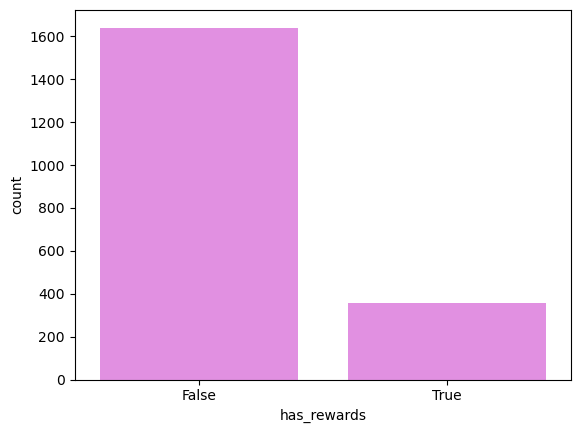

In [12]:
sns.countplot(df.has_rewards, color = 'violet')

C:\Users\Bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

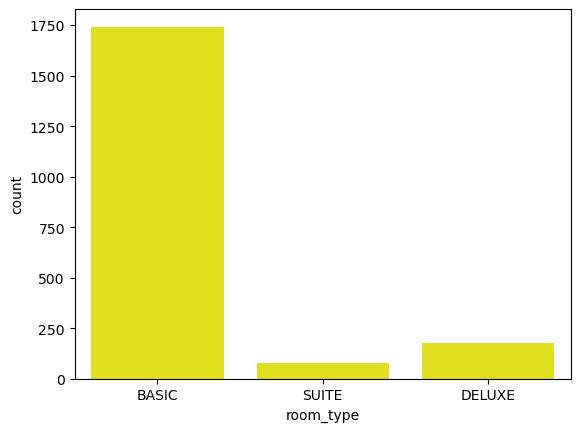

In [14]:
sns.countplot(df.room_type, color = 'yellow')

In [39]:
df.drop(['Unnamed: 0','guest_email','checkin_date','checkout_date','billing_address','credit_card_number'],
         inplace=True, axis=1)

In [40]:
df.head()

,has_rewards,room_type,amenities_fee,room_rate
0,False,BASIC,8.324971,146.834507
1,False,BASIC,NaN,185.497813
2,False,BASIC,22.269158,151.115528
3,False,BASIC,25.468647,182.468031
4,False,BASIC,19.778311,195.497743


In [41]:
df["amenities_fee"].fillna(value = df["amenities_fee"].mean(), inplace = True)

In [42]:
#df.has_rewards = df.has_rewards.map({"False" : 0 , "True" : 1})

In [43]:
df.room_type.unique()

array(['BASIC', 'SUITE', 'DELUXE'], dtype=object)

In [44]:
#df.room_type = df.room_type.map({"Basic" : 0 , "Suite" : 1, "Deluxe" : 2})

In [45]:
df.has_rewards.replace([True, False], [1,0], inplace = True)

In [46]:
df.room_type.replace(['BASIC', 'SUITE', 'DELUXE'], [0,1,2], inplace = True)

In [47]:
df.head()

,has_rewards,room_type,amenities_fee,room_rate
0,0,0,8.324971,146.834507
1,0,0,18.625723,185.497813
2,0,0,22.269158,151.115528
3,0,0,25.468647,182.468031
4,0,0,19.778311,195.497743


In [48]:
x = df.drop(['has_rewards'], axis =1)
y = df.has_rewards

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.6)

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

lr = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_pred_train = LR.predict(x_train)

In [62]:
from sklearn.metrics import classification_report

print("For Test Data : ")
print(classification_report(y_pred, y_test))
print("\nFor Train Data : ")
print(classification_report(y_pred_train, y_train))


For Test Data : 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       780
           1       0.06      0.40      0.10        20

    accuracy                           0.82       800
   macro avg       0.52      0.62      0.50       800
weighted avg       0.96      0.82      0.88       800


For Train Data : 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1179
           1       0.04      0.43      0.07        21

    accuracy                           0.81      1200
   macro avg       0.51      0.62      0.49      1200
weighted avg       0.97      0.81      0.88      1200



In [63]:
from sklearn.metrics import accuracy_score

print("Accuracy of Logistic Regression : ", accuracy_score(y_test, y_pred))

Accuracy of Linear Regression :  0.8225
